<a href="https://colab.research.google.com/github/RonakornST/AI_For_Engineers/blob/main/Iterative_Improvement_Algorithm/Genetic_Algorithm/Genetic_Algorithm_(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Plot example

In [ ]:
import random
import copy


$y=mx+c$

== Sol ==
m = 1.7494287881534936
c = 0.5758310499615242


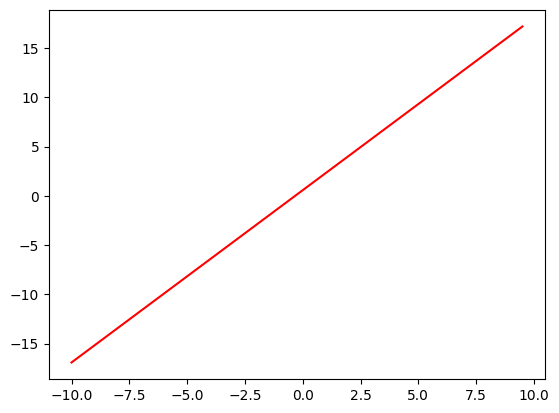

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

m_sol = random.random()*5-2.5
c_sol = random.random()*5-2.5
print('== Sol ==')
print('m =',m_sol)
print('c =',c_sol)

x=np.arange(-10,10,0.5)
y=m_sol*x+c_sol

plt.plot(x,y,'r')

# Extra

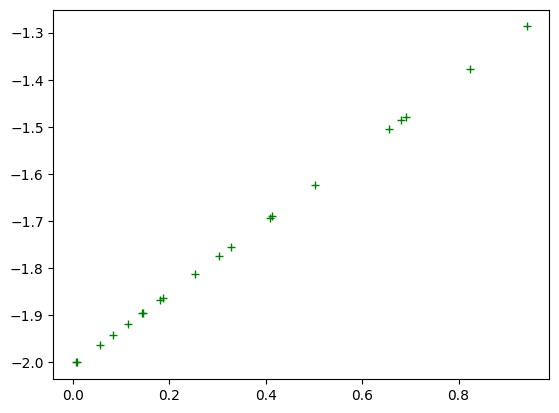

In [ ]:
import random
Data=np.random.rand(20,2)
Data[:,1]=m_sol*Data[:,0]+c_sol+(random.random()/10-0.05)
plt.plot(Data[:,0],Data[:,1],'g+')

# GA to Fit Curve mx+c

Try to fit `y=mx+c`

population:

[m1,c1]
[m2,c2]

In [ ]:
import random
import numpy as np

m_sol=random.random()*10-5
c_sol=random.random()*10-5
m_sol,c_sol

(0.901012571292453, -4.82545208069182)

In [ ]:
def mutation(population):
  mutated = []
  for pop in population:
    p = random.random()
    if p > 0.5:
      mutated.append([pop[0]+random.random()*5-2.5,pop[1]])
    else:
      mutated.append([pop[0],pop[1]+random.random()*5-2.5])
  return mutated

def cross_over(population):
  return [[population[0][0],population[1][1]],[population[1][0],population[0][1]]]

def fitness(param,n):
  m = param[0]
  c = param[1]
  xs = [random.random()*10-5 for i in range(5)]
  ys_hat = np.array([m*xs[i]+c for i in range(5)])
  ys_actual = np.array([m_sol*xs[i]+c_sol for i in range(5)])
  return (ys_hat-ys_actual).dot((ys_hat-ys_actual).T)

def selection(population,n):
  unique_pop = []
  for pop in population:
    if pop not in unique_pop:
      unique_pop.append(pop)
  population = unique_pop
  find_fitness = [(fitness(pop,n),pop) for pop in population]
  find_fitness.sort()
  # print(find_fitness)
  return find_fitness[0],[p for f,p in find_fitness[:2]]

def is_better(p1,p2):
  if len(p2) == 0 or p1[0] <= p2[0]:
    return True
  return False

def show_pop(population):
  for pop in population:
    print(pop)

In [ ]:
n = 2

population = [[int(random.random()*10-5) for i in range(n)]]
population += [[int(random.random()*10-5) for i in range(n)]]
print(population)
mutated = mutation(population)
print(mutated)
crossovered = cross_over(population)
print(crossovered)

[[-1, -2], [4, -1]]
[[-0.30534757493570375, -2], [4, 0.3540829651225934]]
[[-1, -1], [4, -2]]


In [ ]:
n = 2
for i in range(30): # ทำ 30 ครั้ง
  population = [[random.random()*2*n-n for i in range(n)]]
  population += [[random.random()*2*n-n for i in range(n)]]

  print('Start')
  print(population)
  print('=========')
  best_found = tuple()
  for i in range(100000):
    mutated = mutation(population)
    cross_overed = cross_over(population)
    best_pop,population = selection(population+mutated+cross_overed,n)
    if is_better(best_pop,best_found):
      best_found = best_pop
    # show_pop(population)
    if fitness(best_found[1],n) <= 1e-5:
      print('Found at generation',i)
      break
    if i % 1000 == 0:
      print(i,best_found)
      print()
  print('=====')
  print(best_found)
  print()

Start
[[0.7673054695792167, -0.938837050950668], [-1.2838013497055978, 1.68994222497893]]
0 (75.35865983886346, [0.9082525478715411, -0.938837050950668])

1000 (6.223738016543541e-05, [0.9006003420251507, -4.830128879694023])

Found at generation 1312
=====
(1.2117398713515247e-05, [0.9006003420251507, -4.827386193966589])

Start
[[1.0828915529192797, -0.397036398752423], [-0.8872780158729174, -1.0006776371212283]]
0 (69.77547036068448, [1.0828915529192797, -1.0006776371212283])

1000 (2.777479789159856e-06, [0.8986839409645841, -4.8293934051585445])

Found at generation 1455
=====
(2.777479789159856e-06, [0.8986839409645841, -4.8293934051585445])

Start
[[0.9568395039903672, -0.34166082394790376], [1.2435873603881684, 0.8289340119982334]]
0 (95.81602472865143, [0.9568395039903672, -0.34166082394790376])

1000 (0.00012861015132879623, [0.9076224786836828, -4.845064215270796])

2000 (3.7847579689190705e-05, [0.9049801302239282, -4.831046319125264])

Found at generation 2188
=====
(1.815

## GA to Fit Curve for cubic equation

This is an exercise. You can try to do it.

Try to fit $ax^3+bx^2+cx+d$

population:

[a,b,c,d]
[a,b,c,d]

In [ ]:
import random
import numpy as np

a_sol=random.random()*5-2.5
b_sol=random.random()*5-2.5
c_sol=random.random()*5-2.5
d_sol=random.random()*10-5

# show target coefficient values
print('a = :', a_sol)
print('b = :', b_sol)
print('c = :', c_sol)
print('d = :', d_sol)

a = : -2.0708259643213562
b = : 0.9773283650072049
c = : -2.4858436935884125
d = : -2.486725068933829


## Modify this part for cubic equation

In [ ]:
def mutation(population):
    mutated = []
    for pop in population:
        mutated.append([
            pop[0] + (random.random() * 5 - 2.5) if random.random() > 0.5 else pop[0],
            pop[1] + (random.random() * 5 - 2.5) if random.random() > 0.5 else pop[1],
            pop[2] + (random.random() * 5 - 2.5) if random.random() > 0.5 else pop[2],
            pop[3] + (random.random() * 10 - 5) if random.random() > 0.5 else pop[3]
        ])
    return mutated

def cross_over(population):
    ## before cross over
    # [population[0][0], population[0][1], population[0][2], population[0][3]],
    # [population[1][0], population[1][1], population[1][2], population[1][3]]
    return [
        [population[0][0], population[1][1], population[0][2], population[1][3]],
        [population[1][0], population[0][1], population[1][2], population[0][3]]
    ]


def fitness(params):
    a, b, c, d = params
    xs = [random.random() * 10 - 5 for i in range(5)]
    ys_hat = np.array([a*x**3 + b*x**2 + c*x + d for x in xs])
    ys_actual = np.array([a_sol*x**3 + b_sol*x**2 + c_sol*x + d_sol for x in xs])
    # return np.sum((ys_hat - ys_actual) ** 2)
    return (ys_hat-ys_actual).dot((ys_hat-ys_actual).T)

def selection(population,n):
  unique_pop = []
  for pop in population:
    if pop not in unique_pop:
      unique_pop.append(pop)
  population = unique_pop
  #find_fitness = [(fitness(pop,n),pop) for pop in population]
  find_fitness = [(fitness(pop),pop) for pop in population]
  find_fitness.sort()
  # print(find_fitness)
  return find_fitness[0],[p for f,p in find_fitness[:2]]

def is_better(p1,p2):
  if len(p2) == 0 or p1[0] <= p2[0]:
    return True
  return False

def show_pop(population):
  for pop in population:
    print(pop)

In [ ]:
n = 4

population = [[int(random.random()*10-5) for i in range(n)]]
population += [[int(random.random()*10-5) for i in range(n)]]
print("population:",population)
mutated = mutation(population)
print("mutated population:",mutated)
crossovered = cross_over(population)
print("crossovered population",crossovered)

population: [[-4, 0, -2, 3], [3, -1, 4, 1]]
mutated population: [[-2.020803192637347, 1.0688102352745013, -0.494549391916161, 0.3250511066808057], [3, -1, 6.061747509625683, 1]]
crossovered population [[-4, -1, -2, 1], [3, 0, 4, 3]]


In [ ]:
n = 4
for i in range(30):
  population = [[int(random.random()*n) for i in range(n)]]
  population += [[int(random.random()*n) for i in range(n)]]

  print('Start')
  print(population)
  print('=========')
  best_found = tuple()
  for i in range(100000):
    mutated = mutation(population)
    cross_overed = cross_over(population)
    best_pop,population = selection(population+mutated+cross_overed,n)
    if is_better(best_pop,best_found):
      best_found = best_pop
    # show_pop(population)
    #if fitness(best_found[1],n) <= 1e-3:
    if fitness(best_found[1]) <= 1e-3:
      print('Found at generation',i)
      print("Actual",[a_sol,b_sol,c_sol,d_sol])
      break
    if i % 1000 == 0:
      print(i,best_found)
      print()
  print('=====')
  print(best_found)
  print()

Start
[[1, 0, 2, 0], [0, 2, 3, 0]]
0 (21263.133977253376, [-1.496972861086367, 2, 3.629232857865318, 2.7757093412864453])

1000 (0.12192754049765034, [-2.065226435811377, 0.91184750692058, -2.7916607778740645, -2.4679705516526838])

Found at generation 1725
Actual [-2.0708259643213562, 0.9773283650072049, -2.4858436935884125, -2.486725068933829]
=====
(0.0009953381618763495, [-2.065226435811377, 0.9603687597741706, -2.4918375924029337, -2.4701760874965366])

Start
[[1, 1, 1, 2], [3, 2, 2, 3]]
0 (6669.690032662764, [1, 1, 1, 2])

1000 (0.04280194603718304, [-2.0421149910454774, 0.8865177328985856, -2.580412302790928, -2.254247229436202])

2000 (0.04280194603718304, [-2.0421149910454774, 0.8865177328985856, -2.580412302790928, -2.254247229436202])

3000 (0.04280194603718304, [-2.0421149910454774, 0.8865177328985856, -2.580412302790928, -2.254247229436202])

4000 (0.02335769353610918, [-2.0787860632771675, 0.9145443223564806, -2.2626421959442977, -2.3982285504243137])

5000 (0.00544323313